## TABLE OF CONTENT
[1. Data pre-processing](#udf_1)<br>
[2. Exploratory Data Analysis](#udf_2)<br>
[3. Build and train model](#udf_3)<br>

<a id='udf_1'></a>
# 1. Data pre-processing

## 1.1. Input data

In [532]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('D:/Tho/Tho/Project - Python'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Tho/Tho/Project - Python\creditcard.csv.zip
D:/Tho/Tho/Project - Python\delivery_orders_march.csv
D:/Tho/Tho/Project - Python\Project Sleep.ipynb
D:/Tho/Tho/Project - Python\SLA_matrix.xlsx
D:/Tho/Tho/Project - Python\sleepdata.csv
D:/Tho/Tho/Project - Python\tn2pv7dc4b-1.zip
D:/Tho/Tho/Project - Python\UCI_Credit_Card.csv
D:/Tho/Tho/Project - Python\UCI_Credit_Card.csv.zip


In [533]:
df = pd.read_csv('D:/Tho/Tho/Project - Python/sleepdata.csv',delimiter=";")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


## 1.2. Pre-processing data

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


#### 1.2.1. "Start" column and "End" column is not in form datetime. The next step is to convert the "Start" column and "End" column to timestamp. Then, add 2 columns: "Start time in second" and "End time in second".

In [535]:
import time
import datetime

In [536]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [537]:
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df = df.drop(columns = ['Start time', 'End time'])

#### 1.2.2. Type of "Sleep quality" column is string. The next step is to convert the "Sleep quality" to integer

In [538]:
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: x[:-1]).astype(int)

#### 1.2.3. Type of "Time in bed" column is string. The next step is to convert the "Time in bed" to datetime

##### We can see "Time in bed" = "Start" - "End"

In [539]:
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

#### 1.2.4. Handle missing value in "Wake up" column

In [540]:
han = df.groupby('Wake up').agg('count')
han

,Start,End,Sleep quality,Time in bed,Sleep Notes,Heart rate,Activity (steps),Start time in second,End time in second
Wake up,,,,,,,,,
:(,1,1,1,1,1,0,1,1,1
:),216,216,216,216,209,147,216,216,216
:|,29,29,29,29,27,15,29,29,29


In [541]:
df['Wake up'] = df['Wake up'].fillna(value = ':)', limit = 563)

In [542]:
df['Wake up'] = df['Wake up'].fillna(value = ':|', limit = 76)

In [543]:
df['Wake up'] = df['Wake up'].fillna(value = ':)', limit = 2)

#### 1.2.5. Process "Sleep Notes"

In [544]:
df['Sleep Notes'] = df['Sleep Notes'].astype(str)

In [545]:
df['Sleep Notes'].values

array(['nan', 'Stressful day', 'nan', 'nan', 'Drank coffee:Drank tea',
       'Drank coffee:Drank tea', 'Drank tea', 'Ate late:Drank coffee',
       'Drank coffee:Drank tea:Worked out', 'Drank tea:Worked out',
       'Drank coffee:Drank tea:Stressful day', 'Drank coffee:Drank tea',
       'Drank coffee:Drank tea', 'Drank coffee:Drank tea', 'Drank tea',
       'Drank tea:Worked out', 'Drank coffee:Drank tea',
       'Drank coffee:Drank tea:Worked out', 'Drank tea',
       'Drank coffee:Drank tea', 'Drank coffee:Drank tea', 'Drank coffee',
       'nan', 'Drank coffee:Drank tea:Worked out',
       'Drank coffee:Drank tea:Worked out',
       'Drank coffee:Drank tea:Worked out', 'Drank coffee',
       'Drank coffee:Drank tea:Stressful day',
       'Drank coffee:Drank tea:Stressful day',
       'Drank coffee:Drank tea:Worked out',
       'Drank coffee:Drank tea:Stressful day', 'Drank coffee:Drank tea',
       'Drank tea', 'Drank coffee:Drank tea', 'Drank tea:Worked out',
       'Drank coffee

We can see informations in "Sleep Notes" column: 'Drank coffee', 'Drank tea', 'Worked out', 'Stressful day', 'Ate late'. So, I make one hot endcoding to 5 new columns.

In [546]:
def aux(dataframe, val):
    my_list = []
    for i in range(len(dataframe)):
        if val in dataframe['Sleep Notes'][i]:
            a = 1
            my_list.append(a)
        else:
            a = 0
            my_list.append(a)
    dataframe[val] = my_list

In [547]:
list_value_sleep_notes = ['Drank coffee', 'Drank tea', 'Worked out', 'Stressful day', 'Ate late']
for e in (list_value_sleep_notes):
    aux(df,e)

In [548]:
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,30744.0,:),nan,59.0,0,82669,27013,0,0,0,0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,964.0,:|,Stressful day,72.0,0,76670,77634,0,0,0,1,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,30642.0,:|,nan,57.0,0,81769,26011,0,0,0,0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,27120.0,:),nan,NaN,0,81061,21781,0,0,0,0,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,24265.0,:),Drank coffee:Drank tea,68.0,0,79930,17795,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91,32881.0,:|,nan,NaN,56,78854,25335,0,0,0,0,0
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81,25894.0,:|,nan,NaN,64,85759,25253,0,0,0,0,0
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71,32207.0,:|,nan,NaN,3316,77045,22852,0,0,0,0,0
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80,33239.0,:),nan,NaN,6555,77792,24631,0,0,0,0,0


#### 1.2.6. Handle missing values in "Heart rate" column

In [549]:
df['Heart rate'] = df['Heart rate'].fillna(value = df['Heart rate'].mean())

In [550]:
df2 = df.drop(columns = ['Sleep Notes', 'Start','End'])
df2

,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,100,30744.0,:),59.000000,0,82669,27013,0,0,0,0,0
1,3,964.0,:|,72.000000,0,76670,77634,0,0,0,1,0
2,98,30642.0,:|,57.000000,0,81769,26011,0,0,0,0,0
3,65,27120.0,:),60.604938,0,81061,21781,0,0,0,0,0
4,72,24265.0,:),68.000000,0,79930,17795,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,91,32881.0,:|,60.604938,56,78854,25335,0,0,0,0,0
883,81,25894.0,:|,60.604938,64,85759,25253,0,0,0,0,0
884,71,32207.0,:|,60.604938,3316,77045,22852,0,0,0,0,0
885,80,33239.0,:),60.604938,6555,77792,24631,0,0,0,0,0


#### 1.2.7. Check data again

In [551]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sleep quality         887 non-null    int32  
 1   Time in bed           887 non-null    float64
 2   Wake up               887 non-null    object 
 3   Heart rate            887 non-null    float64
 4   Activity (steps)      887 non-null    int64  
 5   Start time in second  887 non-null    int64  
 6   End time in second    887 non-null    int64  
 7   Drank coffee          887 non-null    int64  
 8   Drank tea             887 non-null    int64  
 9   Worked out            887 non-null    int64  
 10  Stressful day         887 non-null    int64  
 11  Ate late              887 non-null    int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 79.8+ KB


In [552]:
df2.describe()

,Sleep quality,Time in bed,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,74.895152,27545.254791,60.604938,2776.378805,72771.413754,23267.739572,0.590755,0.514092,0.410372,0.065389,0.023675
std,15.433292,4648.211587,3.027846,3486.482157,23305.625306,3717.788253,0.491972,0.500083,0.492179,0.247350,0.152121
min,0.000000,905.000000,49.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,26369.500000,60.604938,0.000000,78449.500000,21458.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,27859.000000,60.604938,255.000000,80330.000000,22808.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,84.000000,29571.500000,60.604938,5317.000000,82054.500000,24692.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,100.000000,38765.000000,98.000000,21870.000000,86329.000000,77634.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [553]:
df2.isnull().sum()

Sleep quality           0
Time in bed             0
Wake up                 0
Heart rate              0
Activity (steps)        0
Start time in second    0
End time in second      0
Drank coffee            0
Drank tea               0
Worked out              0
Stressful day           0
Ate late                0
dtype: int64

<a id='udf_2'></a>
# 2. Exploratory Data Analysis

## 2.1. Visualize data

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns

In [555]:
num_col = ["Sleep quality", "Time in bed", "Start time in second", "End time in second","Activity (steps)","Heart rate"]

#### 2.1.1. Histogram

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

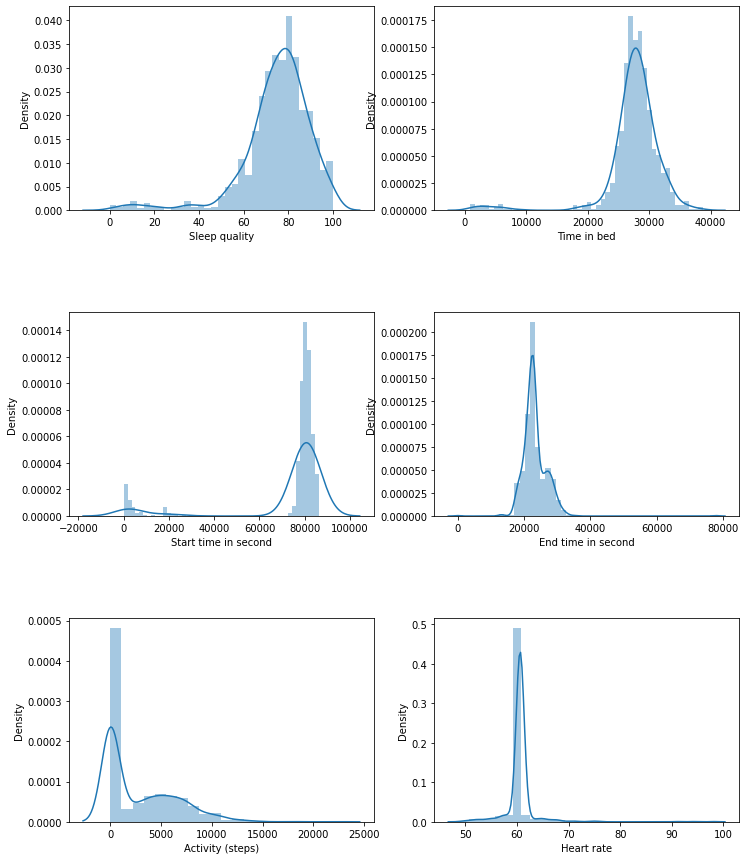

In [556]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for index,col in enumerate(num_col):
    x,y = index//2,index%2
    sns.distplot(df2[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

- "Sleep quality", "Time in bed", "Start time in second" chart has distribution skewed to the left.
- Quality of sleep distribute from 0% to 100%, focus on 70-90%. Time in bed distribute from 0 second to 40000 seconds, focus on 25000-32000 seconds. Start time distribute from 0 to 83000, focus on 67000-83000.
- "End time in second","Heart rate chart has distribution skewed to the right.
- End time distribute from 17000 to 31000, focus on 21000-24000. Heart rate distribute from 50 to 70, focus on ~ 60.

#### 2.1.1. Regression

In [557]:
def replt(var):
    ax= sns.regplot(y=var,x='Sleep quality',data= df2,scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    ax.set_ylabel(var)
    ax.set_xlabel('Sleep quality')
    plt.title('')
    plt.show()

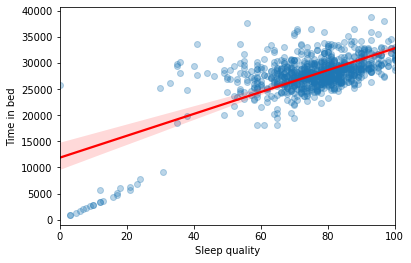

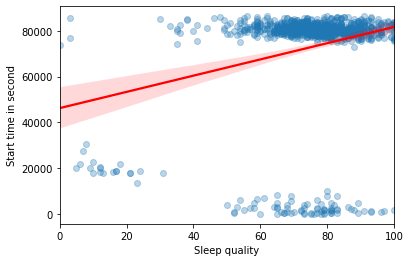

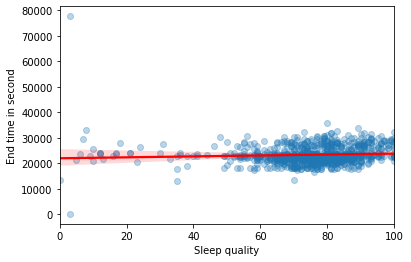

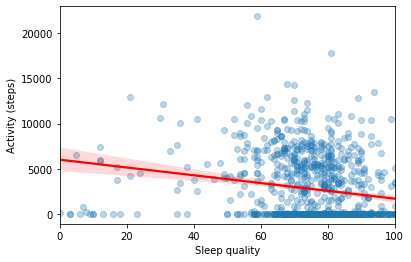

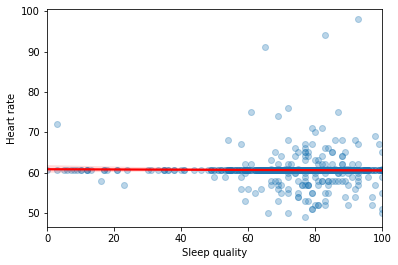

In [558]:
for e in num_col:
    if e != 'Sleep quality':
        replt(e)

## 2.2. Outliers detection

In [559]:
def outlier(df, column):
    # first quantile/percentile
    first_qrt = np.quantile(df[column],0.25)
    # third quantile/percentile
    third_qrt = np.quantile(df[column],0.75)
    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5
    df_outliers = df.loc[(df[column] < lower_whisker) | (df[column] > upper_whisker) ] 
    print(column,':',len(df_outliers))

In [560]:
# The mount of outliers
for col in num_col:
    outlier(df2,col)

Sleep quality : 37
Time in bed : 50
Start time in second : 96
End time in second : 41
Activity (steps) : 5
Heart rate : 162


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

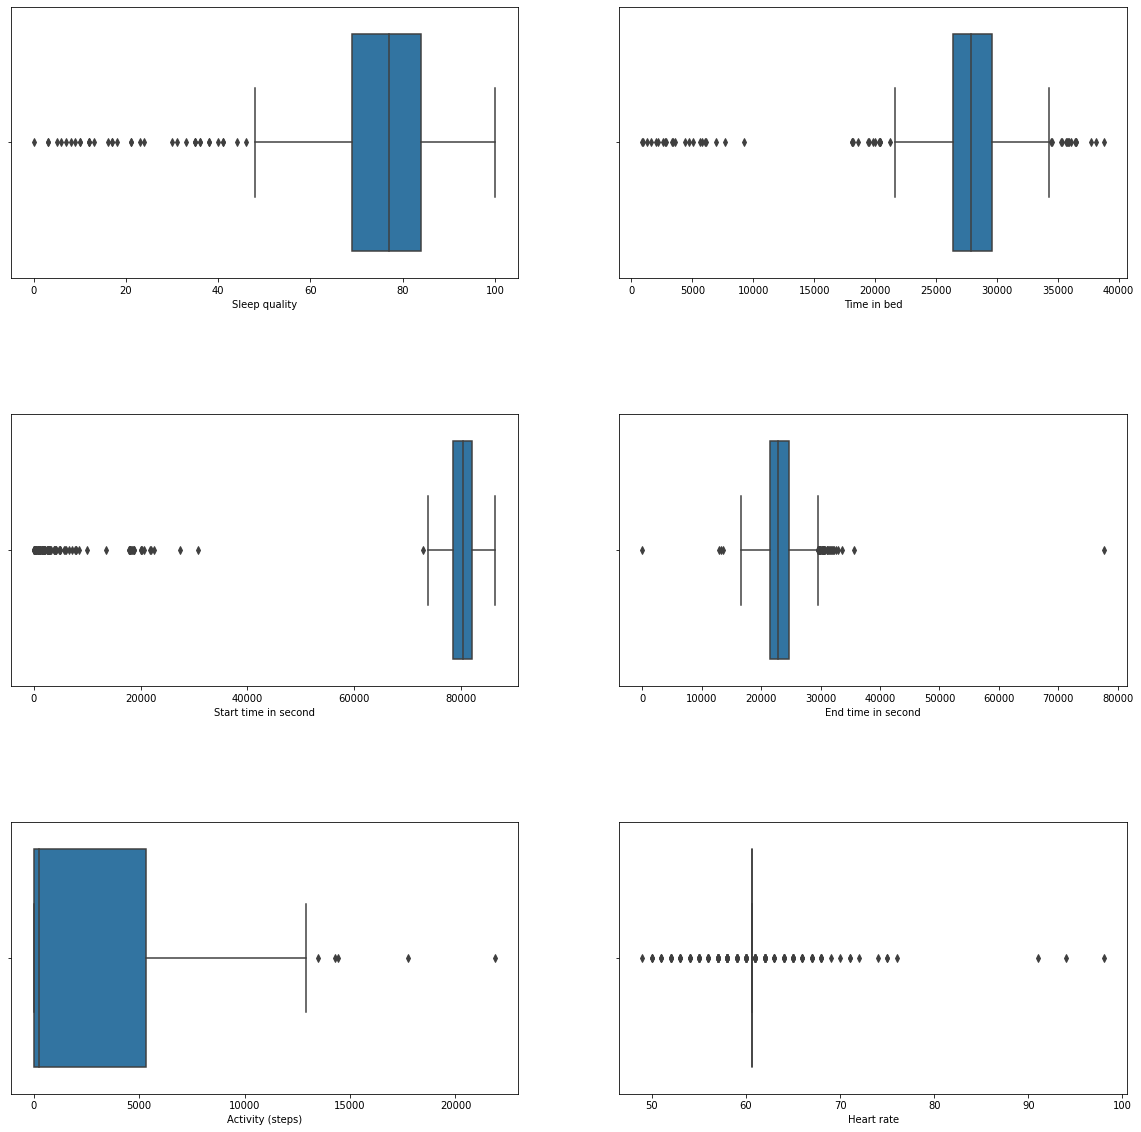

In [561]:
fig,axes = plt.subplots(3,2,figsize=(20,20))
for index,col in enumerate(num_col):
    x,y = index//2,index%2
    sns.boxplot(df2[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

The percent of outliers is usually less than 10%. So "Start time in second" and "Heart rate" need process outlier

In [562]:
import scipy.stats

In [563]:
df2['Heart rate'] = scipy.stats.mstats.winsorize(df2['Heart rate'],limits = [0,0.15])

In [564]:
df3 = df2.copy()

In [565]:
# The mount of outliers
for col in num_col:
    outlier(df3,col)

Sleep quality : 37
Time in bed : 50
Start time in second : 96
End time in second : 41
Activity (steps) : 5
Heart rate : 92


In [566]:
df3

,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,100,30744.0,:),59.000000,0,82669,27013,0,0,0,0,0
1,3,964.0,:|,60.604938,0,76670,77634,0,0,0,1,0
2,98,30642.0,:|,57.000000,0,81769,26011,0,0,0,0,0
3,65,27120.0,:),60.604938,0,81061,21781,0,0,0,0,0
4,72,24265.0,:),60.604938,0,79930,17795,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,91,32881.0,:|,60.604938,56,78854,25335,0,0,0,0,0
883,81,25894.0,:|,60.604938,64,85759,25253,0,0,0,0,0
884,71,32207.0,:|,60.604938,3316,77045,22852,0,0,0,0,0
885,80,33239.0,:),60.604938,6555,77792,24631,0,0,0,0,0


## 2.3. Encoding categorical features

In [567]:
onehot_dt = pd.get_dummies(df3,drop_first = False)
onehot_dt

,Sleep quality,Time in bed,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Wake up_:(,Wake up_:),Wake up_:|
0,100,30744.0,59.000000,0,82669,27013,0,0,0,0,0,0,1,0
1,3,964.0,60.604938,0,76670,77634,0,0,0,1,0,0,0,1
2,98,30642.0,57.000000,0,81769,26011,0,0,0,0,0,0,0,1
3,65,27120.0,60.604938,0,81061,21781,0,0,0,0,0,0,1,0
4,72,24265.0,60.604938,0,79930,17795,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,91,32881.0,60.604938,56,78854,25335,0,0,0,0,0,0,0,1
883,81,25894.0,60.604938,64,85759,25253,0,0,0,0,0,0,0,1
884,71,32207.0,60.604938,3316,77045,22852,0,0,0,0,0,0,0,1
885,80,33239.0,60.604938,6555,77792,24631,0,0,0,0,0,0,1,0


## 2.4. Features Selection

In [568]:
corrMatrix = df3.corr()
corrMatrix

,Sleep quality,Time in bed,Heart rate,Activity (steps),Start time in second,End time in second,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
Sleep quality,1.000000,0.695206,-0.070854,-0.190491,0.234936,0.076523,0.107466,0.152647,0.039400,0.051173,0.022692
Time in bed,0.695206,1.000000,0.000200,-0.013831,0.398909,0.097175,0.057818,0.074154,0.004938,0.015622,-0.007611
Heart rate,-0.070854,0.000200,1.000000,0.221350,-0.007081,0.084744,-0.112822,-0.136668,-0.066510,-0.009763,-0.032763
Activity (steps),-0.190491,-0.013831,0.221350,1.000000,-0.038875,0.076142,-0.265023,-0.020481,-0.046091,-0.107305,-0.048218
Start time in second,0.234936,0.398909,-0.007081,-0.038875,1.000000,-0.344245,0.014888,0.052453,0.032650,0.025427,0.025157
End time in second,0.076523,0.097175,0.084744,0.076142,-0.344245,1.000000,-0.032317,-0.069047,-0.183295,0.043469,-0.071283
Drank coffee,0.107466,0.057818,-0.112822,-0.265023,0.014888,-0.032317,1.000000,0.278079,0.377399,0.155228,0.129610
Drank tea,0.152647,0.074154,-0.136668,-0.020481,0.052453,-0.069047,0.278079,1.000000,0.306644,0.038165,0.077210
Worked out,0.039400,0.004938,-0.066510,-0.046091,0.032650,-0.183295,0.377399,0.306644,1.000000,0.085279,0.066061
Stressful day,0.051173,0.015622,-0.009763,-0.107305,0.025427,0.043469,0.155228,0.038165,0.085279,1.000000,-0.011194


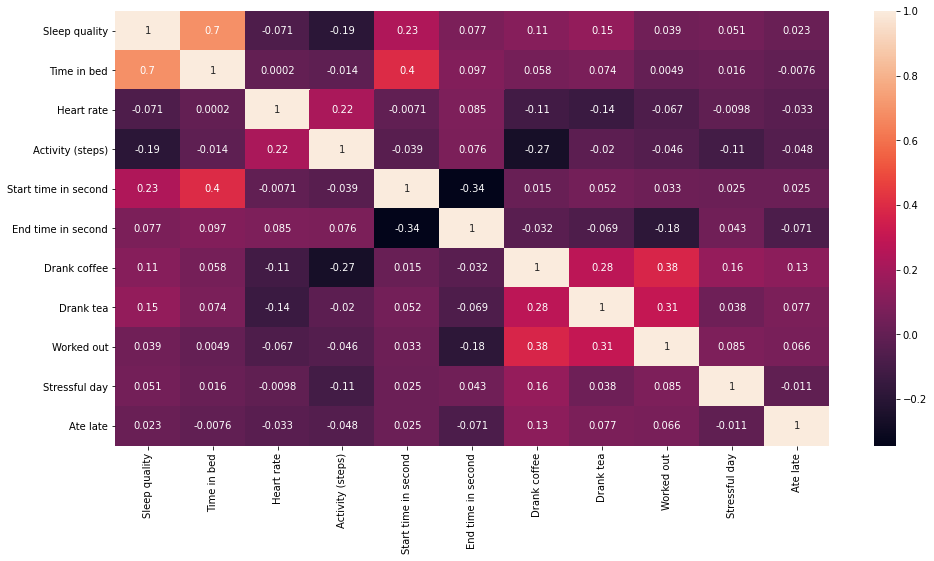

In [569]:
plt.figure(figsize=(16, 8))
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [570]:
# Identify target variable
target = onehot_dt['Sleep quality']
variables = onehot_dt.drop(columns = 'Sleep quality')

In [571]:
# Identify P-values of variable
import statsmodels.api as sm
mod = sm.OLS(target,variables)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

Time in bed             1.954487e-116
Heart rate               3.868300e-01
Activity (steps)         1.015510e-12
Start time in second     4.848476e-02
End time in second       6.196016e-01
Drank coffee             4.255155e-01
Drank tea                2.128773e-04
Worked out               9.620197e-01
Stressful day            3.863603e-01
Ate late                 4.941097e-01
Wake up_:(               4.271079e-02
Wake up_:)               8.302388e-02
Wake up_:|               9.958183e-02
Name: P>|t|, dtype: float64

In [572]:
mod = sm.OLS(target,variables)
fii = mod.fit()
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Time in bed,0.002358,0.000088,26.874246,1.954487e-116,0.002185,2.529845e-03
Heart rate,-0.200559,0.231642,-0.865814,3.868300e-01,-0.655198,2.540808e-01
Activity (steps),-0.000799,0.000110,-7.235384,1.015510e-12,-0.001016,-5.821333e-04
Start time in second,-0.000037,0.000019,-1.975860,4.848476e-02,-0.000073,-2.440598e-07
End time in second,0.000054,0.000110,0.496592,6.196016e-01,-0.000161,2.698375e-04
Drank coffee,-0.687831,0.862742,-0.797262,4.255155e-01,-2.381120,1.005457e+00
Drank tea,2.911914,0.783011,3.718868,2.128773e-04,1.375113,4.448716e+00
Worked out,0.039184,0.822619,0.047633,9.620197e-01,-1.575356,1.653724e+00
Stressful day,1.276767,1.473185,0.866671,3.863603e-01,-1.614628,4.168161e+00
Ate late,1.627738,2.379476,0.684074,4.941097e-01,-3.042416,6.297892e+00


<a id='udf_3'></a>
# 3. Build and train model

## 3.1. Train and test split

In [596]:
# split data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onehot_dt.drop(columns ='Sleep quality'), onehot_dt['Sleep quality'], test_size=0.1, random_state=42)

In [597]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3.2. Linear Regression

In [598]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.6809462548907099


Standard Scaler

In [599]:
from sklearn.preprocessing import StandardScaler

In [600]:
sc = StandardScaler()

In [601]:
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

Revised model

In [602]:
#Train the model
revised_model = LinearRegression()
revised_model.fit(X_train_new, y_train)

LinearRegression()

In [603]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

accuracy_score(y_test, revised_model.predict(X_test_new))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## 3.3. Saving model

In [605]:
import pickle
filename = 'sleep_quality.sav'
pickle.dump(lm, open(filename, 'wb'))

In [607]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6809462548907099
